# Friends-of-Friends (FoF) Algorithm

**Goal**: Group objects based on proximity — if any two objects are closer than a given linking length, they belong to the same group.

**Use Cases**:
- Identifying galaxy groups or clusters in cosmological simulations
- Particle halo finding in N-body simulations
- Simple density-based clustering (precursor to DBSCAN)

**Steps**:
1. Define a linking length (distance threshold)
2. For each object, find all neighbors within this threshold
3. Link all transitive neighbors (friend of a friend is also a friend)
4. Output: group labels for each object

**Key Concepts**:
- Linking length
- Transitive closure
- Graph connectivity
- No global centroid or shape assumption


## Introduction to Friends-of-Friends (FoF)

FoF is a clustering method based on **proximity and transitivity**:

Two points are **friends** if their distance is less than a threshold $\ell$ (called the **linking length**). A **group** is formed from all objects connected via friend links — including indirect (transitive) connections.

This can be interpreted as finding **connected components** in an undirected graph, where an edge exists between any two points closer than $\ell$.

---

### Differences from Other Algorithms

| Algorithm | Core Idea                | Requires k? | Requires shape? |
|----------|--------------------------|-------------|------------------|
| FoF      | Friends within distance  | No          | No               |
| DBSCAN   | Density connectivity      | Yes (minPts) | No               |
| KMeans   | Centroid distance         | Yes         | Yes (spherical)  |

---

### Linking Length Choice

- In astrophysics: $\ell = b \cdot \bar{n}^{-1/3}$, where $b$ is a dimensionless parameter (~0.2) and $\bar{n}$ is number density
- In Euclidean space: use absolute distance like 0.5 or 1.0


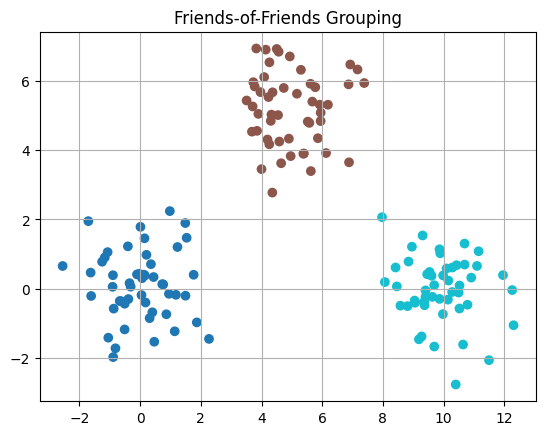

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import KDTree

def fof(data, linking_length):
    n = len(data)
    tree = KDTree(data)
    visited = np.zeros(n, dtype=bool)
    group_labels = -np.ones(n, dtype=int)
    group_id = 0

    for i in range(n):
        if not visited[i]:
            to_visit = [i]
            group_labels[i] = group_id
            visited[i] = True

            while to_visit:
                current = to_visit.pop()
                neighbors = tree.query_ball_point(data[current], linking_length)
                for neighbor in neighbors:
                    if not visited[neighbor]:
                        visited[neighbor] = True
                        group_labels[neighbor] = group_id
                        to_visit.append(neighbor)
            group_id += 1
    return group_labels

# Example: clustered 2D points
np.random.seed(0)
cluster1 = np.random.randn(50, 2) + np.array([0, 0])
cluster2 = np.random.randn(50, 2) + np.array([5, 5])
cluster3 = np.random.randn(50, 2) + np.array([10, 0])
X = np.vstack([cluster1, cluster2, cluster3])

labels = fof(X, linking_length=1.5)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='tab10')
plt.title("Friends-of-Friends Grouping")
plt.grid(True)
plt.show()


## Further Topics to Explore

1. Compare FoF with DBSCAN (density-based extension)
2. Apply FoF to real cosmological datasets (e.g., galaxies in 3D)
3. Use adaptive linking length (e.g., scaled with local density)
4. Explore graph-based optimization (e.g., Union-Find for large-scale FoF)
5. Use FoF as a pre-processing step for substructure finding
